In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None) 
import seaborn as sns


In [22]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/300.2 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv('cleaned_df.csv')

In [8]:
df  = df.drop(columns = ['Unnamed: 0'])

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'city', 'job_state', 'age',
       'python_yn', 'excel', 'tableau', 'spark', 'r_yn', 'desc_len'],
      dtype='object')

In [35]:
pd.DataFrame(df['Job Title'].unique())

,0
0,Senior Data Scientist
1,"Manager, Model Validation"
2,Sr. Finance & Data Analyst
3,"Data Labeling Quality Specialist, Public Secto..."
4,NLP Data Scientist - Python | Machine Learning...
5,Data Scientist (Active security clearance requ...
6,Project Manager / Senior Data Analyst
7,Data Scientist
8,Lead Data Scientist
9,AI Engineer


In [36]:
def title_simplifier(title):
    
    
    if 'data scientist' in title.lower() or 'data science' in title.lower()or 'scientist' in title.lower() or 'Statistician' in title.lower() or 'statistical' in title.lower():
        return 'data scientist'
    
    elif 'machine learning' in title.lower() or 'ai' in title.lower() or'ml' in title.lower() or'artificial engineer' in title.lower() or 'model validation' in title.lower():
        return 'machine learning engineer'
    
    elif 'data engineer' in title.lower():
        return 'data engineer'
    
    elif 'analyst' in title.lower() or 'data visualization' in title.lower():
        return 'analyst'
    
    elif 'manager' in title.lower():
        return 'manager'
    
    elif 'director' in title.lower():
        return 'director'
    
    else:
        return 'engineer'
    
def seniority(title):
    if 'sr' in title.lower() or 'advisor' in title.lower() or 'vp' in title.lower() or 'senior' in title.lower() or 'manager' in title.lower() or'manager,' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    else:
        return 'jr'
 

In [37]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [38]:
df['seniority'] = df['Job Title'].apply(seniority)

In [39]:
df.seniority.value_counts()

seniority
jr        324
senior    291
Name: count, dtype: int64

In [41]:
df.job_simp.value_counts()

job_simp
data scientist               424
machine learning engineer     85
engineer                      69
analyst                       25
data engineer                 12
Name: count, dtype: int64

In [10]:
df.seniority.count()

581

In [47]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,age,python_yn,excel,tableau,spark,r_yn,desc_len
count,615.000000,615.000000,615.000000,615.0,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.0,615.000000
mean,3.929431,1953.284553,0.099187,0.0,113.918699,166.208130,133.127642,70.715447,0.718699,0.461789,0.154472,0.258537,0.0,5110.110569
std,0.374595,61.503836,0.299156,0.0,38.289314,50.138202,46.052941,61.503836,0.450000,0.498944,0.361694,0.438187,0.0,2011.155408
min,3.000000,1781.000000,0.000000,0.0,26.000000,36.000000,15.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,889.000000
25%,3.700000,1919.000000,0.000000,0.0,84.000000,130.000000,98.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.0,3560.000000
50%,4.000000,1975.000000,0.000000,0.0,110.000000,160.000000,127.500000,49.000000,1.000000,0.000000,0.000000,0.000000,0.0,5125.000000
75%,4.200000,1996.000000,0.000000,0.0,140.000000,190.000000,161.500000,105.000000,1.000000,1.000000,0.000000,1.000000,0.0,6685.000000
max,5.000000,2020.000000,1.000000,0.0,243.000000,357.000000,272.500000,243.000000,1.000000,1.000000,1.000000,1.000000,0.0,10611.000000


<Axes: >

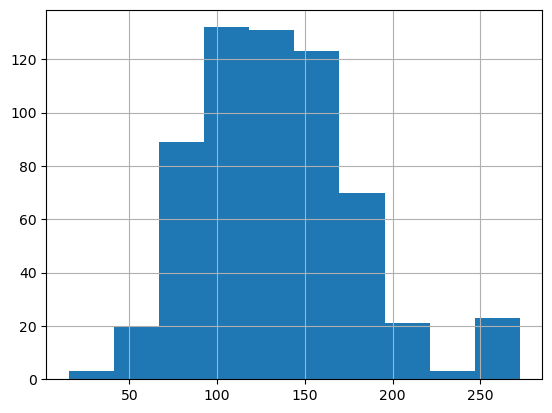

In [44]:
df.avg_salary.hist()

In [45]:
corr = df[['avg_salary','Rating','age']].corr()
corr

,avg_salary,Rating,age
avg_salary,1.000000,0.218711,-0.100866
Rating,0.218711,1.000000,-0.004485
age,-0.100866,-0.004485,1.000000


<Axes: >

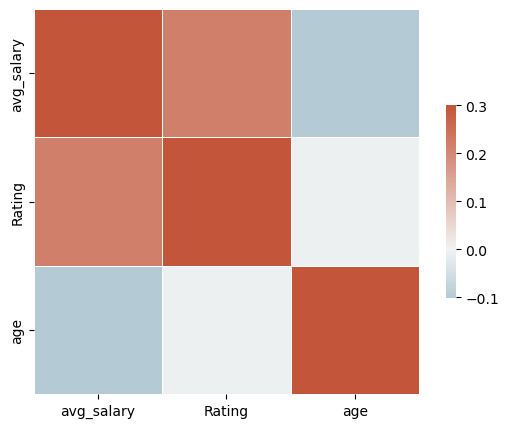

In [46]:
f,ax = plt.subplots(figsize = (7,5))

cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr,  cmap = cmap, vmax = .3, center = 0 , square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'city', 'age',
       'python_yn', 'r_yn', 'job_simp', 'seniority'],
      dtype='object')

In [50]:
df_cat = df[['Company Name', 'Location', 'Size', 'Type of ownership','Industry', 'Sector', 'Revenue','job_state','python_yn', 'r_yn', 'spark', 'tableau', 'job_simp', 'seniority']]

Graph for Company Name: total = 99


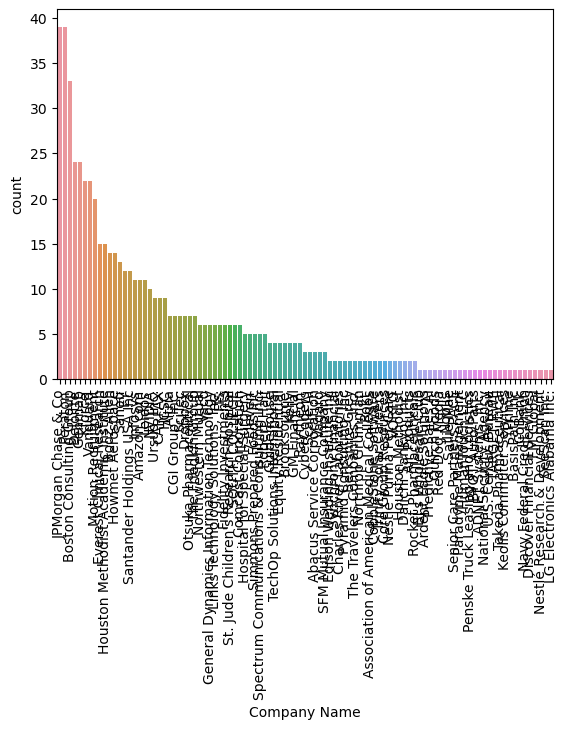

Graph for Location: total = 93


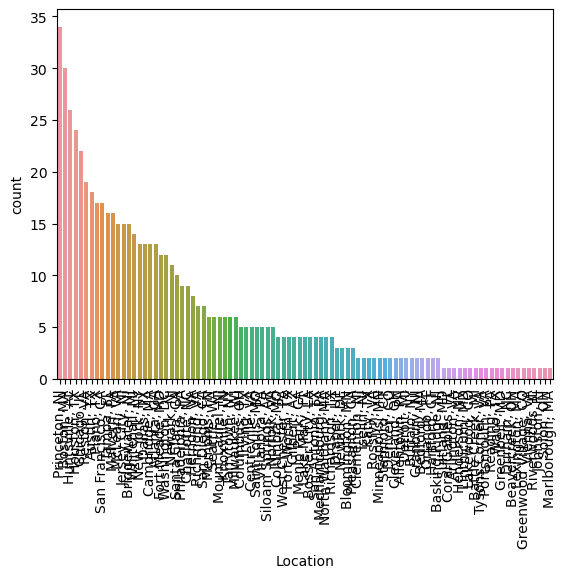

Graph for Size: total = 8


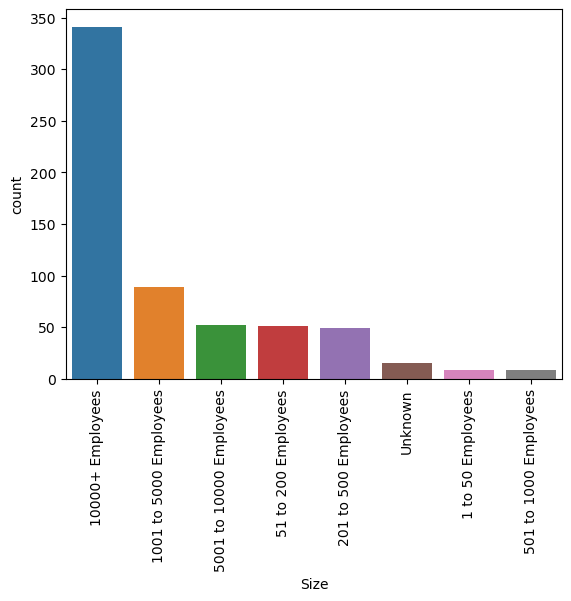

Graph for Type of ownership: total = 8


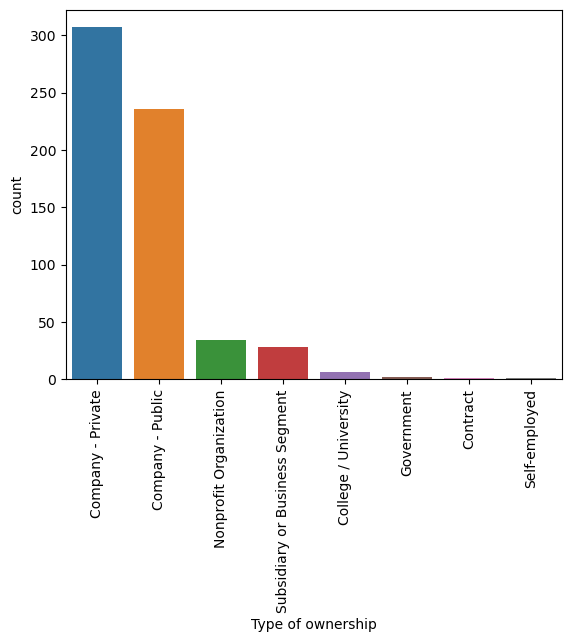

Graph for Industry: total = 34


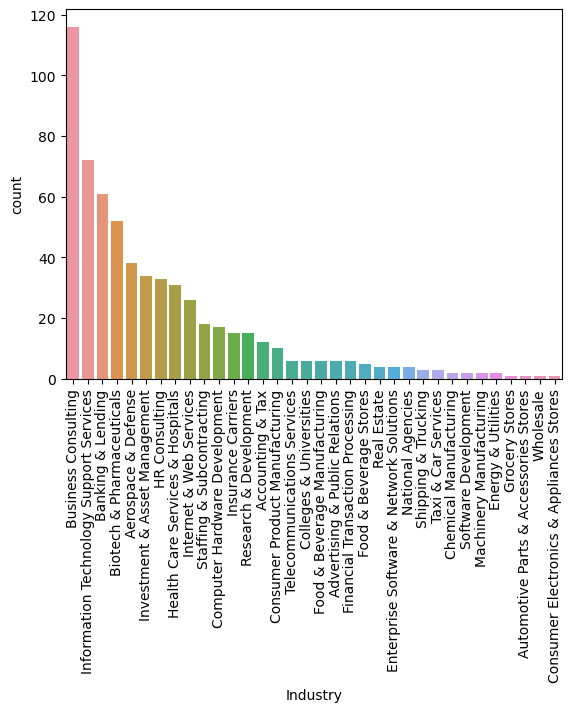

Graph for Sector: total = 17


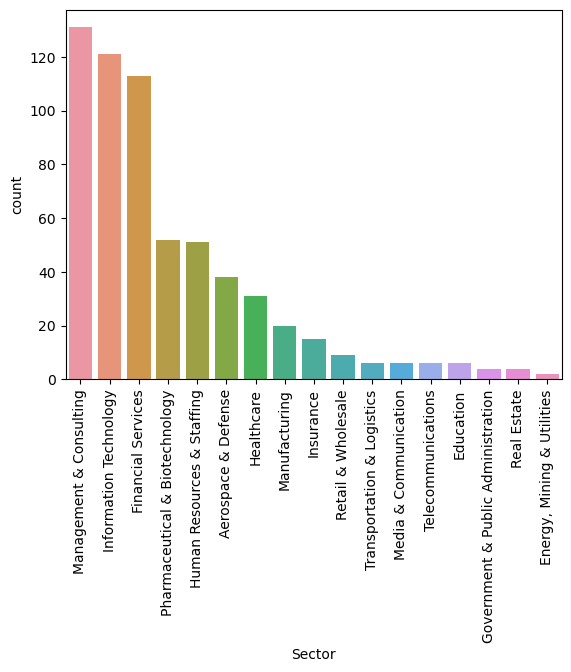

Graph for Revenue: total = 9


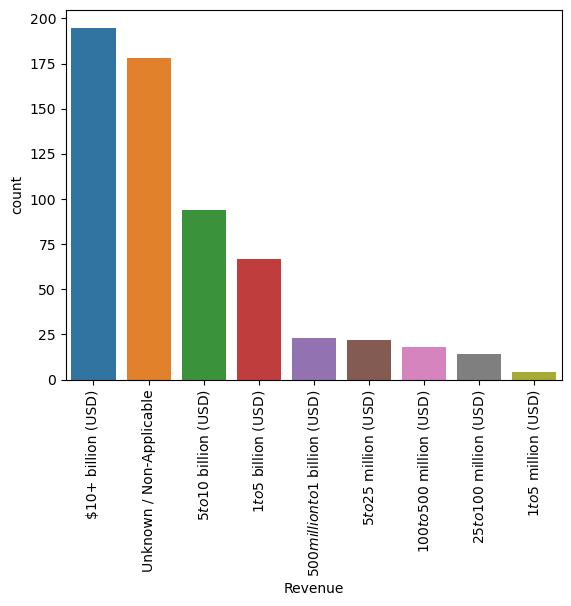

Graph for job_state: total = 30


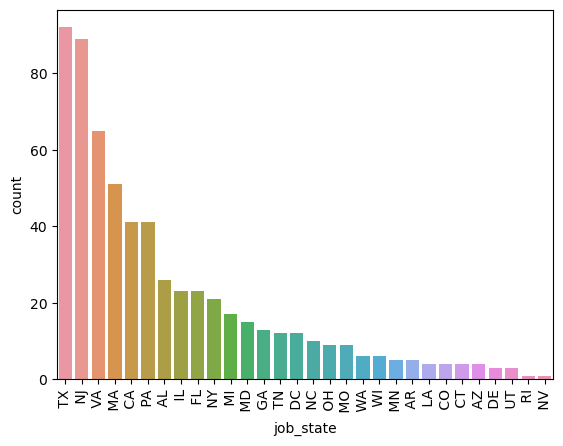

Graph for python_yn: total = 2


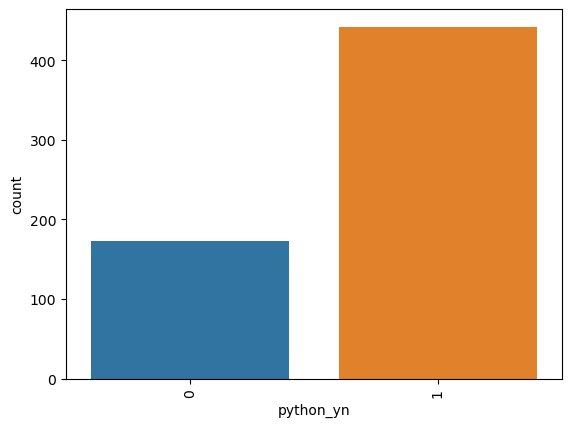

Graph for r_yn: total = 1


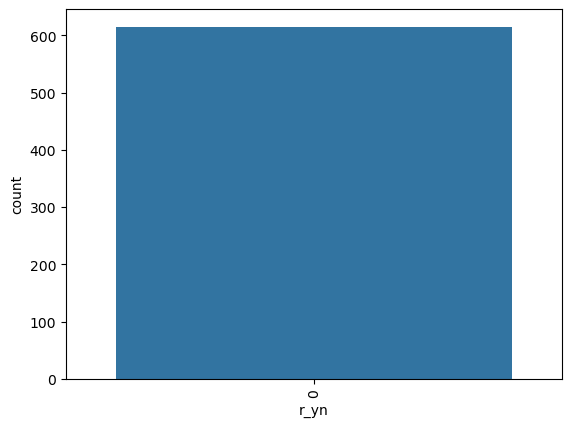

Graph for spark: total = 2


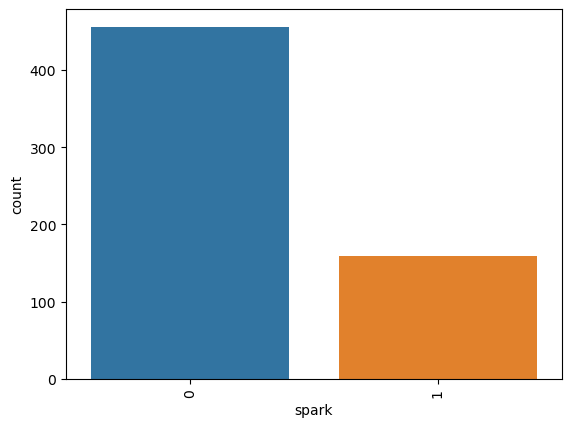

Graph for tableau: total = 2


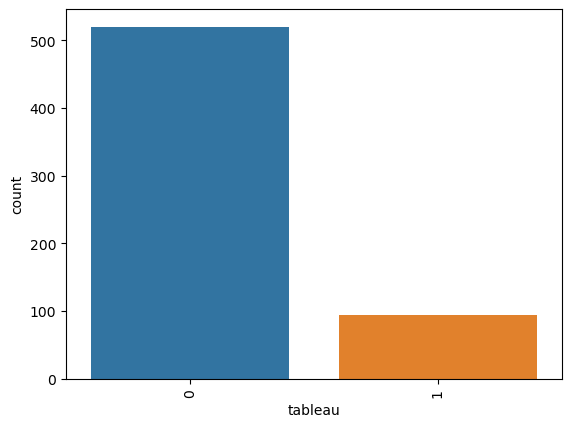

Graph for job_simp: total = 5


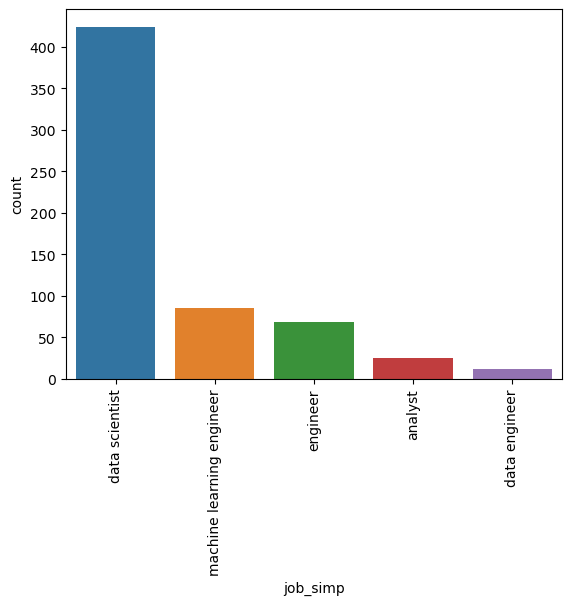

Graph for seniority: total = 2


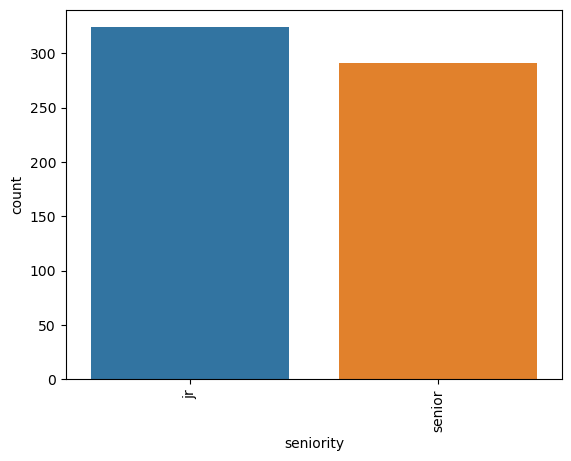

In [51]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d'%(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num, data = df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


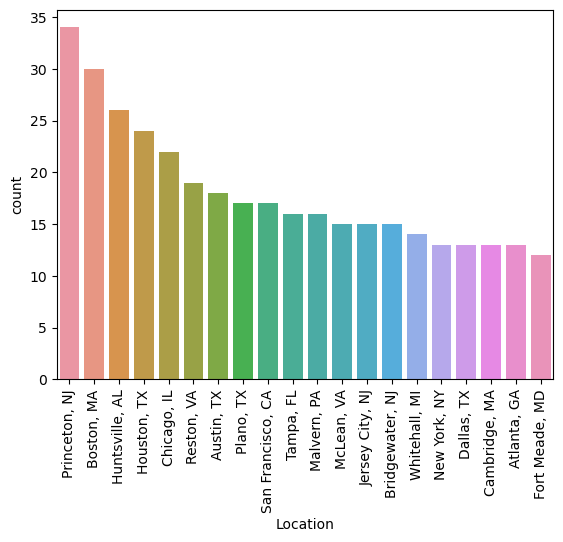

Graph for Company Name: total = 20


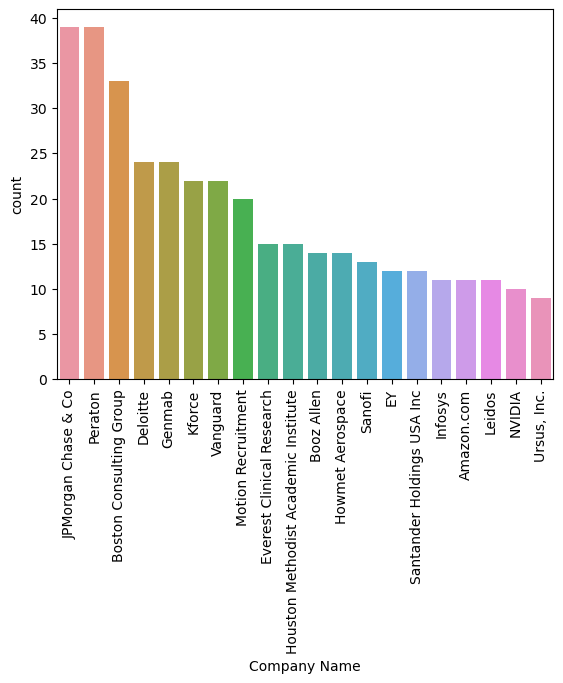

In [52]:
for i in df_cat[['Location', 'Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: total = %d'%(i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num, data = df_cat)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [53]:
pd.pivot_table(df,index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp                  seniority            
analyst                   jr          90.357143
                          senior      85.333333
data engineer             jr         113.750000
data scientist            jr         123.919598
                          senior     148.091111
engineer                  jr         115.243902
                          senior     163.482143
machine learning engineer jr         125.400000
                          senior     145.300000

In [54]:
pd.pivot_table(df,index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                             
 WI       data scientist                      6
 WA       data scientist                      6
 VA       machine learning engineer           4
          data scientist                     60
          analyst                             1
 UT       machine learning engineer           3
 TX       machine learning engineer          10
          engineer                           18
          data scientist                     62
          analyst                             2
 TN       data scientist                      6
          analyst                             6
 RI       machine learning engineer           1
 PA       data engineer                       1
          analyst                             2
          data scientist                     38
 OH       machine learning engineer           5
          engineer                            2
          data scientist                      2
 NY       machine learning engineer           5
          data scientist                     16
 NV       data scientist                      1
 NJ       data scientist                     59
          data engineer                       3
          engineer                           18
          machine learning engineer           9
 NC       engineer                            1
          data scientist                      9
 MO       machine learning engineer           2
          engineer                            3
          data scientist                      4
 MN       data scientist                      2
          engineer                            3
 MI       machine learning engineer          14
          data scientist                      2
          analyst                             1
 MD       machine learning engineer           1
          data scientist                     14
 MA       machine learning engineer           8
          engineer                            8
          data scientist                     35
 LA       data scientist                      4
 IL       machine learning engineer           4
          engineer                            6
          data scientist                      7
          data engineer                       6
 GA       data scientist                     12
          analyst                             1
 FL       analyst                             2
          data engineer                       1
          data scientist                     20
 DE       machine learning engineer           1
          data scientist                      2
 DC       data scientist                     10
          analyst                             2
 CT       machine learning engineer           2
          engineer                            2
 CO       machine learning engineer           2
          engineer                            1
          analyst                             1
 CA       machine learning engineer          14
          engineer                            7
          data scientist                     20
 AZ       analyst                             2
          data scientist                      1
          data engineer                       1
 AR       analyst                             5
 AL       data scientist                     26

In [46]:
pd.pivot_table(df[df['job_simp'] == 'data scientist'],index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CT,185.000000
MA,165.000000
NY,164.428571
VA,155.871795
CO,150.000000
TN,145.000000
GA,138.875000
DC,138.050000
MD,136.380952


In [55]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'city', 'job_state', 'age',
       'python_yn', 'excel', 'tableau', 'spark', 'r_yn', 'desc_len',
       'job_simp', 'seniority'],
      dtype='object')

In [58]:
df_pivots = df[['Rating','Industry', 'Type of ownership','Sector','Revenue', 'hourly', 'employer provided','excel', 'python_yn', 'r_yn','spark','tableau','avg_salary', 'desc_len']]

In [59]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
4.4     183.812500
4.3     167.225806
3.6     158.172414
3.1     153.000000
4.6     146.953125
4.5     140.318182
4.0     136.243363
4.2     133.166667
3.5     131.142857
3.7     125.163636
3.9     124.291667
5.0     121.250000
3.4     120.432432
4.7     114.550000
3.8     114.313187
3.0     114.125000
4.1     109.294118
3.2      86.250000
3.3      85.375000
Industry
                                          avg_salary
Industry                                            
Computer Hardware Development             229.911765
Research & Development                    157.533333
Energy & Utilities                        155.000000
Grocery Stores                            153.000000
Business Consulting                       148.452586
Taxi & Car Services                       145.500000
Internet & Web Services                   141.403846
Insurance Carriers                        140.133333
Aerospace & Defense                       137.355263
In

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [60]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),11.0,56.0
$1 to $5 million (USD),NaN,4.0
$10+ billion (USD),55.0,140.0
$100 to $500 million (USD),6.0,12.0
$25 to $100 million (USD),3.0,11.0
$5 to $10 billion (USD),16.0,78.0
$5 to $25 million (USD),16.0,6.0
$500 million to $1 billion (USD),11.0,12.0
Unknown / Non-Applicable,55.0,123.0


In [59]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'city', 'age',
       'python_yn', 'r_yn', 'job_simp', 'seniority'],
      dtype='object')

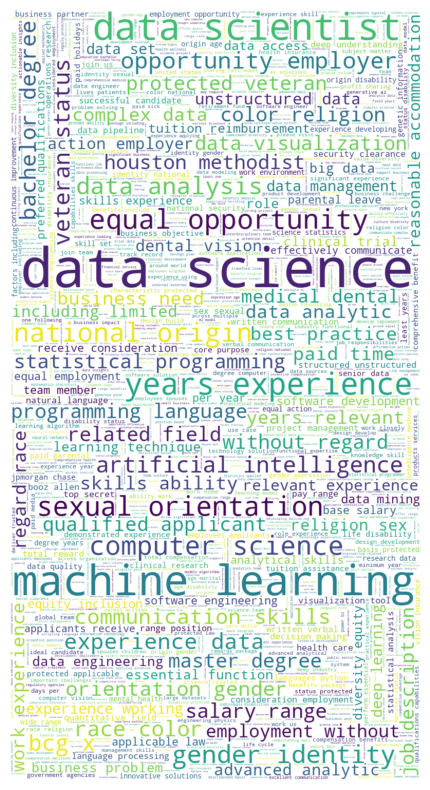

In [67]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()